In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
sales = pd.read_csv('datasets/Gosales_Tx_LogisticRegression.csv')
sales.head()

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
0,False,M,27,Single,Professional
1,False,F,39,Married,Other
2,False,F,39,Married,Other
3,False,F,56,Unspecified,Hospitality
4,False,M,45,Married,Retired


In [6]:
sales.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,60252.0,34.187479,10.105477,17.0,26.0,33.0,41.0,69.0


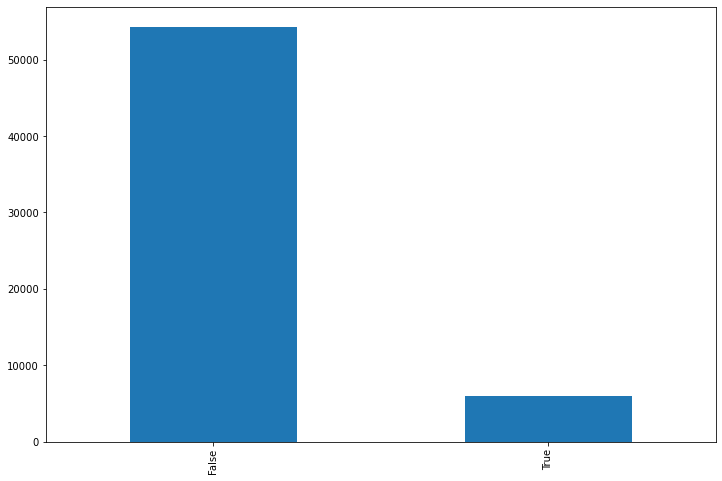

In [9]:
plt.figure(figsize=(12,8))
pd.value_counts(sales['IS_TENT']).plot.bar()
plt.show()

In [19]:
#Using label encoder to encode Gender to unique numeic values
gender = ['M','F']
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder = label_encoder.fit(gender)
sales['GENDER'] = label_encoder.transform(sales['GENDER'].astype(str))

In [20]:
label_encoder.classes_

array(['F', 'M'], dtype='<U1')

In [22]:
sales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
8938,False,0,32,Married,Retail
7262,False,1,56,Married,Other
59915,False,1,52,Married,Other
19158,False,0,47,Unspecified,Hospitality
45456,False,1,59,Married,Trades
46072,True,1,25,Single,Executive
38947,False,0,34,Married,Other
33379,False,0,48,Married,Executive
43856,False,1,24,Single,Professional
20643,False,1,22,Unspecified,Other


In [26]:
# #Using One-Hot encoder to encode Martial Status to unique numeic values
one_hot_encoder = preprocessing.OneHotEncoder()
one_hot_encoder = one_hot_encoder.fit(sales['MARITAL_STATUS'].values.reshape(-1,1))
one_hot = one_hot_encoder.transform(sales['MARITAL_STATUS'].values.reshape(-1,1)).toarray()
one_hot

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [27]:
one_hot_encoder.categories_

[array(['Married', 'Single', 'Unspecified'], dtype=object)]

In [30]:
# The values encoded are in an array.
# Assigning the values as columns in the dataframe
one_hot_df = pd.DataFrame()
one_hot_df['MARITAL_STATUS_MARRIED']=one_hot[:,0]
one_hot_df['MARITAL_STATUS_SINGLE']=one_hot[:,1]
one_hot_df['MARITAL_STATUS_UNSPECIFIED']=one_hot[:,2]
one_hot_df.head()

,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNSPECIFIED
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [35]:
sales_encoded = pd.concat([sales,one_hot_df], axis=1)
sales_encoded.drop('MARITAL_STATUS',axis=1, inplace=True)
sales_encoded.sample(10)

,IS_TENT,GENDER,AGE,PROFESSION,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNSPECIFIED
13216,False,0,26,Student,0.0,1.0,0.0
50100,False,0,52,Other,1.0,0.0,0.0
12123,False,0,38,Other,1.0,0.0,0.0
12550,False,1,21,Sales,0.0,1.0,0.0
4343,False,0,37,Other,1.0,0.0,0.0
33823,False,0,25,Other,1.0,0.0,0.0
41269,False,1,58,Other,1.0,0.0,0.0
49504,False,1,41,Other,1.0,0.0,0.0
15622,False,0,35,Executive,1.0,0.0,0.0
18769,False,0,41,Sales,0.0,0.0,1.0


In [37]:
# Easier way to one-hot encode categorical values when using a pandas df\
sales = pd.get_dummies(sales_encoded, columns=['PROFESSION'])
sales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNSPECIFIED,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
57119,False,1,37,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
43634,False,0,33,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
890,False,0,61,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
46084,False,0,39,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0
14148,False,0,33,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0
6659,False,1,42,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0
22762,True,1,31,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0
16677,False,1,49,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
57852,False,1,19,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
24132,False,1,21,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0


In [38]:
sales = pd.read_csv('datasets/Gosales_Tx_LogisticRegression.csv')
sales.head()

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
0,False,M,27,Single,Professional
1,False,F,39,Married,Other
2,False,F,39,Married,Other
3,False,F,56,Unspecified,Hospitality
4,False,M,45,Married,Retired


In [41]:
# One-hot encoding the entire df at once
sales = pd.get_dummies(sales)
sales.head(10)

,IS_TENT,AGE,GENDER_F,GENDER_M,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
0,False,27,0,1,0,1,0,0,0,0,1,0,0,0,0,0
1,False,39,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,False,39,1,0,1,0,0,0,0,1,0,0,0,0,0,0
3,False,56,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4,False,45,0,1,1,0,0,0,0,0,0,0,1,0,0,0
5,False,45,0,1,1,0,0,0,0,0,0,0,1,0,0,0
6,False,39,1,0,1,0,0,0,0,1,0,0,0,0,0,0
7,False,49,1,0,1,0,0,0,0,1,0,0,0,0,0,0
8,False,49,1,0,1,0,0,0,0,1,0,0,0,0,0,0
9,False,47,0,1,1,0,0,0,0,0,0,0,1,0,0,0
